**Classificação página 83**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
#mnist

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**conveter o target de str para int**<br>

In [8]:
y = y.astype(int)

In [9]:
type(y), y.iloc[9], y.iloc[9].shape

(pandas.core.series.Series, np.int64(4), ())

In [10]:
type(X), X.iloc[9], X.iloc[9].shape

(pandas.core.frame.DataFrame,
 pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
 pixel5      0
            ..
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 pixel784    0
 Name: 9, Length: 784, dtype: int64,
 (784,))

In [11]:
import numpy as np

In [12]:
X.iloc[7].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
np.set_printoptions(linewidth=200)

X.iloc[7].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226, 252, 253, 252, 252, 252, 252, 252

<br>**Há 70 mil imagens e cada imagem possui 784 características (cada imagem tem 784=28×28 pixels).**<br>
**Cada característica representa a intensidade de um pixel, de 0 (branco) a 255 (preto).**<br>
**Vamos visualizar um dígito com a função imshow() do Matplotlib.**<br>
**Só precisa pegar um vetor de features de uma instância e remodelá-lo para um array de 28 × 28.**<br><br>

In [14]:
y.iloc[7]

np.int64(3)

In [15]:
import matplotlib.pyplot as plt

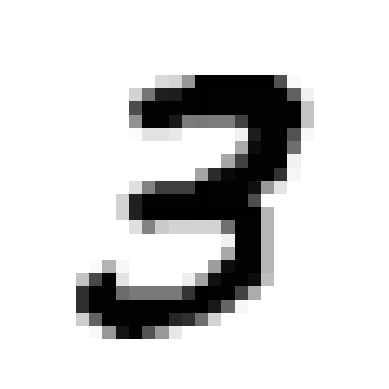

In [16]:
dig = X.iloc[7]
img = dig.values.reshape(28,28)
plt.imshow(img, cmap=plt.cm.gray_r)
#plt.imshow(img)
plt.axis('off');

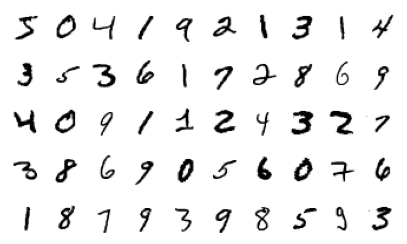

In [17]:
plt.figure(figsize=(5, 3))
for i in range(50):    
    plt.subplot(5,10, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='binary')               
    plt.axis('off')

**<br><br>1 - Separar dados de teste**<br>
**O dataset MNIST disponível no OpenML segue a divisão tradicional de 60.000 imagens para treinamento e 10.000 para teste. Isto é consistente com a versão original do dataset, que foi projetado para facilitar a criação e avaliação de modelos de aprendizado de máquina, especialmente em tarefas de classificação de dígitos manuscritos.**<br>

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train[59999]

np.int64(8)

In [20]:
y_test[60000]

np.int64(7)

In [21]:
y_train.shape, y_test.shape

((60000,), (10000,))

**<br>2 - Embaralhar os dados para**<br>
* Evitar dependências estruturais ou padrões não intencionais (por exemplo, todos os dígitos 0 seguidos de todos os dígitos 1, etc.)
* Reduzir o risco de overfitting (o modelo pode começar a "memorizar" a sequência de dados em vez de aprender a generalizar)
* Preparar para cross-validation, na qual é essencial que os dados sejam embaralhados para garantir que as divisões dos dados sejam aleatórias.
* Em modelo como Stochastic Gradient Descent (SGD), embaralhar os dados em cada época pode ajudar a reduzir a correlação entre as amostras consecutivas<br>

In [22]:
from sklearn.utils import shuffle

In [23]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

**<center>Parou aqui em 11 de outubro**

**<center>Treinando classificador binário**

**Classificador binário capaz de distinguir apenas entre duas classes: 5 e não 5 (livro Géron)**

In [24]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [25]:
print(y_train_5[:20])

12628    False
37730    False
39991    False
8525     False
8279     False
51012    False
14871    False
15127    False
9366      True
33322    False
53390    False
21819     True
5026     False
23428    False
45297    False
26354    False
30195    False
47038    False
20731    False
34047    False
Name: class, dtype: bool


In [26]:
y_train.value_counts()

class
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [27]:
(y_train != 5).sum(), (y_train == 5).sum()

(np.int64(54579), np.int64(5421))

**<br>Classificador binário capaz de distinguir apenas entre duas classes: 1 e 7**

In [28]:
X_train_1 = X_train[y_train == 1]
y_train_1 = y_train[y_train == 1]
print(y_train_1[:40].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
y_train_1.shape

(6742,)

In [30]:
X_train_7 = X_train[y_train == 7]
y_train_7 = y_train[y_train == 7]
print(y_train_7[:40].values)

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [31]:
y_train_7.shape

(6265,)

In [32]:
import pandas as pd

In [33]:
X_train_1_7 = pd.concat([X_train_1, X_train_7], axis=0, ignore_index=True)
y_train_1_7 = pd.concat([y_train_1, y_train_7], axis=0, ignore_index=True)

In [34]:
y_train_1_7

0        1
1        1
2        1
3        1
4        1
        ..
13002    7
13003    7
13004    7
13005    7
13006    7
Name: class, Length: 13007, dtype: int64

In [35]:
X_train_1_7, y_train_1_7 = shuffle(X_train_1_7, y_train_1_7, random_state=42)

In [36]:
y_train_1_7

2858     1
7565     7
12151    7
11560    7
8323     7
        ..
11964    7
5191     1
5390     1
860      1
7270     7
Name: class, Length: 13007, dtype: int64

In [37]:
X_train_1_7 = X_train_1_7.reset_index(drop=True)
y_train_1_7 = y_train_1_7.reset_index(drop=True)

In [38]:
y_train_1_7 

0        1
1        7
2        7
3        7
4        7
        ..
13002    7
13003    1
13004    1
13005    1
13006    7
Name: class, Length: 13007, dtype: int64

In [39]:
y_train_1_7.value_counts()

class
1    6742
7    6265
Name: count, dtype: int64

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd_clf = SGDClassifier(random_state=42)

In [42]:
sgd_clf.fit(X_train_1_7, y_train_1_7)

SGDClassifier(random_state=42)

In [43]:
y_train_1_7[0], sgd_clf.predict(X_train_1_7.iloc[[0]])

(np.int64(1), array([1]))

In [44]:
y_train_1_7[1], sgd_clf.predict(X_train_1_7.iloc[[1]])

(np.int64(7), array([7]))

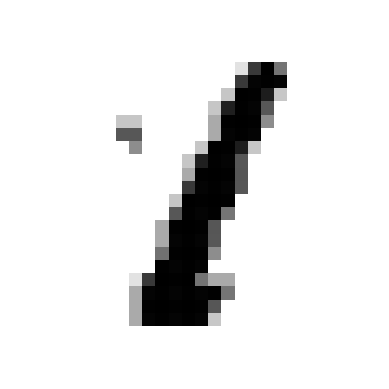

In [45]:
dig = X_train_1_7.iloc[0]
img = dig.values.reshape(28,28)
plt.imshow(img, cmap=plt.cm.gray_r)
#plt.imshow(img)
plt.axis('off');

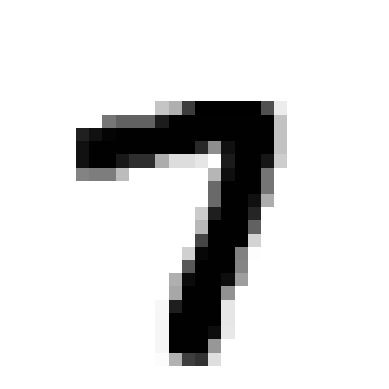

In [46]:
dig = X_train_1_7.iloc[1]
img = dig.values.reshape(28,28)
plt.imshow(img, cmap=plt.cm.gray_r)
#plt.imshow(img)
plt.axis('off');

In [47]:
y_pred_1_7 = sgd_clf.predict(X_train_1_7.iloc[620:630])

In [48]:
print(y_pred_1_7)
print(y_train_1_7[620:630].values)

[1 1 1 1 1 1 7 7 1 7]
[1 1 1 1 1 7 7 7 1 7]


In [51]:
sgd_pred = sgd_clf.predict(X_train_1_7)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_train_1_7,sgd_pred)

array([[6738,    4],
       [  45, 6220]])

In [ ]:
#                 Previsto 1               Previsto 7
# Real 1     previu 1 e é 1 mesmo       previu 7 mas é 1
# Real 7      previu 1 mas é 7       previu 7 e é 7 mesmo


#                          Previsto
#                    Positivo    Negativo
#         Positivo     TP          FN
#   Real
#         Negativo     FP          TN 

**<br>Matriz de confusão é uma tabela usada em problemas de classificação para avaliar o desempenho de um modelo, comparando as previsões do modelo
com os valores reais dos dados.**<br>

**Ela mostra quantas das classificações corretas e incorretas foram feitas pelo modelo.**<br>

**Os elementos da diagonal principal representam as previsões corretas e os elementos da diagonal secundária representam as previsões incorretas.**<br>

**<br><center>Avaliar o modelo com cross_val_predict**

**A função <u>cross_val_score</u> retorna as pontuações (scores) do modelo após cada rodada de validação cruzada.**<br>
forest_scores = cross_val_score(forest_reg,train_preds,train_labels,coring='neg_mean_squared_error',cv=10)<br>

**A função <u>cross_val_predict</u> retorna as predições feitas durante a validação cruzada.**

In [54]:
from sklearn.model_selection import cross_val_predict

In [55]:
cv_sgd_pred = cross_val_predict(sgd_clf, X_train_1_7, y_train_1_7, cv=3)

In [56]:
cm_1_7 = confusion_matrix(y_train_1_7,cv_sgd_pred)
cm_1_7

array([[6718,   24],
       [  37, 6228]])

**<br>A matriz de confusão fornece muitas informações, mas às vezes é interessante usar uma métrica mais concisa.**<br>
**Uma coisa interessante a ser observada é a <u>acurácia das previsões positivas</u> que é chamada de <u>precisão</u> do classificador.**<br>

$$ \text{Precisão} = \frac{TP}{TP + FP} $$

In [ ]:
#   Exemplo
#   Supondo 200 amostras com 102 números 1 e 98 números 7
#   96     6
#    0     98

#   TP     FN
#   FP     TN 

In [57]:
precisao = 95/(95 + 0)
print('precisão =', precisao * 100, '%')

precisão = 100.0 %


**<br>Precisão foca nos Falsos Positivos. Deu 100% porque toda vez que ele disse que é 1, ele acertou.**<br>
**Mas ele falhou em reconhecer 6 números 1.**<br>
**A precisão sozinha não reflete totalmente o desempenho do modelo. Por isso, é utilizada em conjunto com outra métrica chamada recall (revocação), também conhecida como sensitivity (sensibilidade) ou taxa de verdadeiros positivos**<br>
$$ \text{Recall} = \frac{TP}{TP + FN} $$

In [58]:
recall = 95/(95 + 6)
print('recall =', recall * 100, '%')

recall = 94.05940594059405 %


**<br>A precisão foca nos Falsos Positivos: Nenhuma previsão do número 1 foi errada, então a precisão foi 100%.**<br>
**Recall foca nos Falsos Negativos: O modelo não conseguiu identificar todos os 1 (errou 7 deles), então o recall foi 94%.**<br><br>
**Recall se refere à capacidade do modelo de <u>"recuperar" (recall) todas as instâncias positivas </u>, neste caso, o número 1.**<br><br>

In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
precision_score(y_train_1_7, cv_sgd_pred)*100, 6738/(6738 + 45)*100

(np.float64(99.45225758697262), 99.33657673595754)

In [61]:
recall_score(y_train_1_7, cv_sgd_pred)*100, 6738/(6738 + 4)*100

(np.float64(99.6440225452388), 99.94067042420647)

<br>**recall maior que precisão**<br><br>

**Géron pg 91**<br>
Muitas vezes, é conveniente combinar precisão e recall em uma única métrica chamada pontuação F1,<br>
principalmente se você precisar de uma forma simples de comparar dois classificadores.<br><br>
A pontuação F1 é a média harmônica da precisão e revocação.<br>

A $$\text{média aritmética} = \frac{a + b}{2}$$
trata igualmente todos os valores, a<br>
$$\text{média ponderada} = \frac{p_1 \times a + p_2 \times b}{p_1 + p_2}$$ define pesos para os valores e na <br>
$$\text{média harmônica} = \frac{2}{\left( \frac{1}{a} + \frac{1}{b} \right)} $$<br>
os valores menores influenciam mais. É apropriada para dados que envolvem taxas ou razões.<br><br>

**<center>A média harmônica é definida como o recíproco da média aritmética dos recíprocos dos valores**<br>
$$\text{F}_1 = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right)$$<br>

$$\text{média harmônica} = \frac{2}{\left( \frac{1}{precisão} + \frac{1}{recall} \right)} $$<br>
$$= \frac{2}{\left( \frac{1}{\frac{TP}{TP + FP}} + \frac{1}{\frac{TP}{TP + FN}} \right)} $$<br>
$$= 2 \times \frac{\text{precisão} \times \text{revocação}}{\text{precisão} + \text{revocação}} $$<br>

In [62]:
from sklearn.metrics import f1_score

In [63]:
print(f1_score(y_train_1_7, cv_sgd_pred)*100)
print(precision_score(y_train_1_7, cv_sgd_pred)*100)
print(recall_score(y_train_1_7, cv_sgd_pred)*100)

99.54804771430689
99.45225758697262
99.6440225452388


**<br><br>Classificador binário capaz de distinguir apenas entre duas classes: 4 e 9**

In [64]:
X_train_4 = X_train[y_train == 4]
y_train_4 = y_train[y_train == 4]
X_train_9 = X_train[y_train == 9]
y_train_9 = y_train[y_train == 9]

X_train_4_9 = pd.concat([X_train_4, X_train_9], axis=0, ignore_index=True)
y_train_4_9 = pd.concat([y_train_4, y_train_9], axis=0, ignore_index=True)

sgd_clf4_9 = SGDClassifier(random_state=42)

sgd_clf4_9.fit(X_train_4_9, y_train_4_9)

sgd_pred4_9 = sgd_clf4_9.predict(X_train_4_9)

confusion_matrix(y_train_4_9, sgd_pred4_9)

array([[5730,  112],
       [ 199, 5750]])

In [65]:
cv_sgd_pred4_9 = cross_val_predict(sgd_clf4_9,
                                X_train_4_9,
                                y_train_4_9,
                                cv=3)
confusion_matrix(y_train_4_9, cv_sgd_pred4_9)

array([[5615,  227],
       [ 351, 5598]])

In [66]:
print('        f1_score', f1_score(y_train_4_9, cv_sgd_pred4_9)*100)
print('média aritmética', (precision_score(y_train_4_9, cv_sgd_pred4_9, pos_label=4)+recall_score(y_train_4_9, cv_sgd_pred4_9, pos_label=4))/2*100)
print('\nprecision', precision_score(y_train_4_9, cv_sgd_pred4_9, pos_label=4)*100)
print('   recall', recall_score(y_train_4_9, cv_sgd_pred4_9, pos_label=4)*100)
print('\nErra mais do que deixa escapar')

ValueError: pos_label=1 is not a valid label. It should be one of [4, 9]

In [67]:
cm_1_7

array([[6718,   24],
       [  37, 6228]])

In [68]:
print('        f1_score', f1_score(y_train_1_7, cv_sgd_pred)*100)
print('média aritmética', (precision_score(y_train_1_7, cv_sgd_pred)+recall_score(y_train_1_7, cv_sgd_pred))/2*100)
print('\nprecision', precision_score(y_train_1_7, cv_sgd_pred)*100)
print('recall   ', recall_score(y_train_1_7, cv_sgd_pred)*100)
print('\nErra pouco e deixa escapar poucos')

        f1_score 99.54804771430689
média aritmética 99.5481400661057

precision 99.45225758697262
recall    99.6440225452388

Erra pouco e deixa escapar poucos
